In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

# Folder with all CSV-files
folder_path = "/content/drive/MyDrive/Total_net"

# Find all CSV files
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

# Read and unite CSV files
df_list = [pd.read_csv(file) for file in csv_files]
combined_df = pd.concat(df_list, ignore_index=True)

# Save into 1 CSV-file
combined_df.to_csv('connected_file.csv', index=False)

# download file
df1 = pd.read_csv('connected_file.csv')

df1 = df1.iloc[1:]

# Working with first column (divide it into 2 columns with Date and Time)
df1['Date (GMT+1)'] = pd.to_datetime(df1['Date (GMT+1)'], utc=True)

df1['Date'] = df1['Date (GMT+1)'].dt.date       # Only date
df1['Time'] = df1['Date (GMT+1)'].dt.time       # Only Time

df1.drop(columns=['Date (GMT+1)'], inplace=True)
df1.drop(columns=['Solar'], inplace=True)



# Save
df1.to_csv('with_separated_time_and_date.csv', index=False)


print(len(df1))
df1.head()

Mounted at /content/drive


/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(file) for file in csv_files]
/tmp/ipython-input-2-1272626840.py:10: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,

187299


,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil coal-derived gas,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Wind offshore,Wind onshore,Load (incl. self-consumption),Nuclear,Date,Time
1,1526.9,4501.3,3336.8,2691.3,513.3,159.3,5017.1,23.8,108.6,453.1,1479.8,961.3,2415.1,32462.5,50971.8,NaN,2024-12-31,23:00:00
2,1540.1,4355.5,3350.9,2447.3,513.4,135.3,5000.2,23.8,160.7,838.4,1480.2,961,2601.3,32322.9,50048,NaN,2024-12-31,23:15:00
3,1539.7,4288.4,3347.5,2423.2,513.3,135.1,4952.9,23.8,75.1,435.4,1480.3,961.1,2542.3,32321.4,50088.8,NaN,2024-12-31,23:30:00
4,1567.1,4257.1,3379.6,2411.4,513.3,138,5019.7,23.9,58,105.9,1480,962.5,2450,32383.3,49955.6,NaN,2024-12-31,23:45:00
5,1542.2,4329.6,3930.2,2404.7,513.3,136,4799.9,24,58.5,367,1479.5,966.4,2252.6,32740,49695.9,NaN,2025-01-01,00:00:00


In [ ]:
# Folder with all CSV-files
folder_path2 = "/content/drive/MyDrive/Forecast"

# Find all CSV files
csv_files2 = glob.glob(os.path.join(folder_path2, '*.csv'))

# Read and unite CSV files
df_list2 = [pd.read_csv(file) for file in csv_files2]
combined_df2 = pd.concat(df_list2, ignore_index=True)

# Save into 1 CSV-file
combined_df2.to_csv('connected_file2.csv', index=False)

# download file
df2 = pd.read_csv('connected_file2.csv')

df2 = df2.iloc[1:187300]

# Working with first column (we don't need it here)
df2.drop(columns=['Date (GMT+1)'], inplace=True)

# Save
df2.to_csv('with_separated_time_and_date2.csv', index=False)


print(len(df2))
df2.head()

/tmp/ipython-input-3-1946576450.py:15: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('connected_file2.csv')


187299


,Solar,"Solar forecast (Day-Ahead, D-1 18:00)","Solar forecast (Intraday, 8:00)",Solar forecast (Current)
1,9.9,0,0,0
2,9.3,0,0,0
3,9.3,0,0,0
4,9.5,0,0,0
5,9.9,0,0,0


In [ ]:

final_df = pd.concat([df1, df2], axis=1)
final_df.to_csv('connected_by_columns.csv', index=False)
final_df.head()

# Delete two columns where we don't have enough information
final_df.drop(columns=['Solar forecast (Current)', 'Fossil coal-derived gas', 'Solar forecast (Intraday, 8:00)'], inplace=True)
final_df.head()
final_df = final_df[~final_df.isin(['Power (MW)']).any(axis=1)]

# Germany doesn't have Nuclear energy
final_df.drop(columns=['Nuclear'], inplace=True)

In [ ]:
# We don't need offshore and onshore, just summ it
final_df['Wind offshore'] = pd.to_numeric(final_df['Wind offshore'], errors='coerce')
final_df['Wind onshore'] = pd.to_numeric(final_df['Wind onshore'], errors='coerce')

final_df['Wind'] = final_df['Wind offshore'] + final_df['Wind onshore']
final_df.drop(columns=['Wind offshore','Wind onshore','Solar forecast (Day-Ahead, D-1 18:00)'], inplace=True)
final_df.head()

,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Load (incl. self-consumption),Date,Time,Solar,Wind
1,1526.9,4501.3,3336.8,2691.3,513.3,5017.1,23.8,108.6,453.1,1479.8,961.3,50971.8,2024-12-31,23:00:00,9.9,34877.6
2,1540.1,4355.5,3350.9,2447.3,513.4,5000.2,23.8,160.7,838.4,1480.2,961,50048,2024-12-31,23:15:00,9.3,34924.2
3,1539.7,4288.4,3347.5,2423.2,513.3,4952.9,23.8,75.1,435.4,1480.3,961.1,50088.8,2024-12-31,23:30:00,9.3,34863.7
4,1567.1,4257.1,3379.6,2411.4,513.3,5019.7,23.9,58,105.9,1480,962.5,49955.6,2024-12-31,23:45:00,9.5,34833.3
5,1542.2,4329.6,3930.2,2404.7,513.3,4799.9,24,58.5,367,1479.5,966.4,49695.9,2025-01-01,00:00:00,9.9,34992.6


In [ ]:
#check for NaN values

print(final_df.isna().mean() * 100)
df_clean = final_df.dropna(subset=['Load (incl. self-consumption)'])

Hydro Run-of-River               0.000000
Biomass                          0.000000
Fossil brown coal / lignite      0.000000
Fossil hard coal                 0.000000
Fossil oil                       0.000000
Fossil gas                       0.000000
Geothermal                       0.000000
Hydro water reservoir            0.000000
Hydro pumped storage             0.000000
Others                           0.000000
Waste                            0.000000
Load (incl. self-consumption)    0.000534
Date                             0.000000
Time                             0.000000
Solar                            0.049656
Wind                             0.000000
dtype: float64


In [ ]:
#dropping Nan values
df_clean = df_clean.dropna()
print(df_clean.isna().mean() * 100)

Hydro Run-of-River               0.0
Biomass                          0.0
Fossil brown coal / lignite      0.0
Fossil hard coal                 0.0
Fossil oil                       0.0
Fossil gas                       0.0
Geothermal                       0.0
Hydro water reservoir            0.0
Hydro pumped storage             0.0
Others                           0.0
Waste                            0.0
Load (incl. self-consumption)    0.0
Date                             0.0
Time                             0.0
Solar                            0.0
Wind                             0.0
dtype: float64


In [ ]:

# make a copy
dfd = df_clean.copy()

# === ШАГ 1. Making new index (DateTime format) and converting 'Load' column into numerical type ===
dfd['Datetime'] = pd.to_datetime(dfd['Date'].astype(str) + ' ' + dfd['Time'].astype(str))
dfd.set_index('Datetime', inplace=True)
dfd.sort_index(inplace=True)
dfd['Load (incl. self-consumption)'] = pd.to_numeric(dfd['Load (incl. self-consumption)'], errors='coerce')
dfd = dfd.drop(columns=['Date', 'Time'])  # delete old rows
for col in dfd.columns:
    dfd[col] = pd.to_numeric(dfd[col], errors='coerce')
dfd

,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Load (incl. self-consumption),Solar,Wind
Datetime,,,,,,,,,,,,,,
2019-12-31 23:00:00,1591.9,5396.8,9410.0,2200.5,503.8,9408.1,27.9,451.2,1026.3,1630.5,1399.9,47213.4,4.9,6410.4
2019-12-31 23:15:00,1586.9,5390.0,9434.5,2159.4,503.9,9209.9,27.9,385.7,628.8,1609.6,1409.5,46952.8,4.7,6407.3
2019-12-31 23:30:00,1581.2,5372.1,9467.0,2153.1,503.9,9069.3,27.9,274.5,528.6,1609.2,1416.4,46620.7,4.5,6649.0
2019-12-31 23:45:00,1581.3,5372.3,9479.7,2186.7,503.9,8956.1,27.8,98.7,312.0,1609.5,1408.1,46425.5,4.6,6896.0
2020-01-01 00:00:00,1581.8,5369.3,9540.4,2145.8,503.9,8659.5,27.9,244.1,723.0,1609.3,1385.0,46283.2,4.5,6985.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-04 21:00:00,1684.6,4534.7,7411.2,1109.6,331.8,4555.1,15.1,260.0,772.0,1083.6,894.8,44676.6,0.0,10876.0
2025-05-04 21:15:00,1666.2,4526.7,7232.7,1029.7,331.8,4540.2,15.1,127.0,507.0,1083.6,889.3,43930.1,0.0,11291.0
2025-05-04 21:30:00,1666.2,4521.0,7272.7,981.7,331.8,4507.2,15.1,87.0,213.0,1083.6,883.9,43159.4,0.0,11757.0


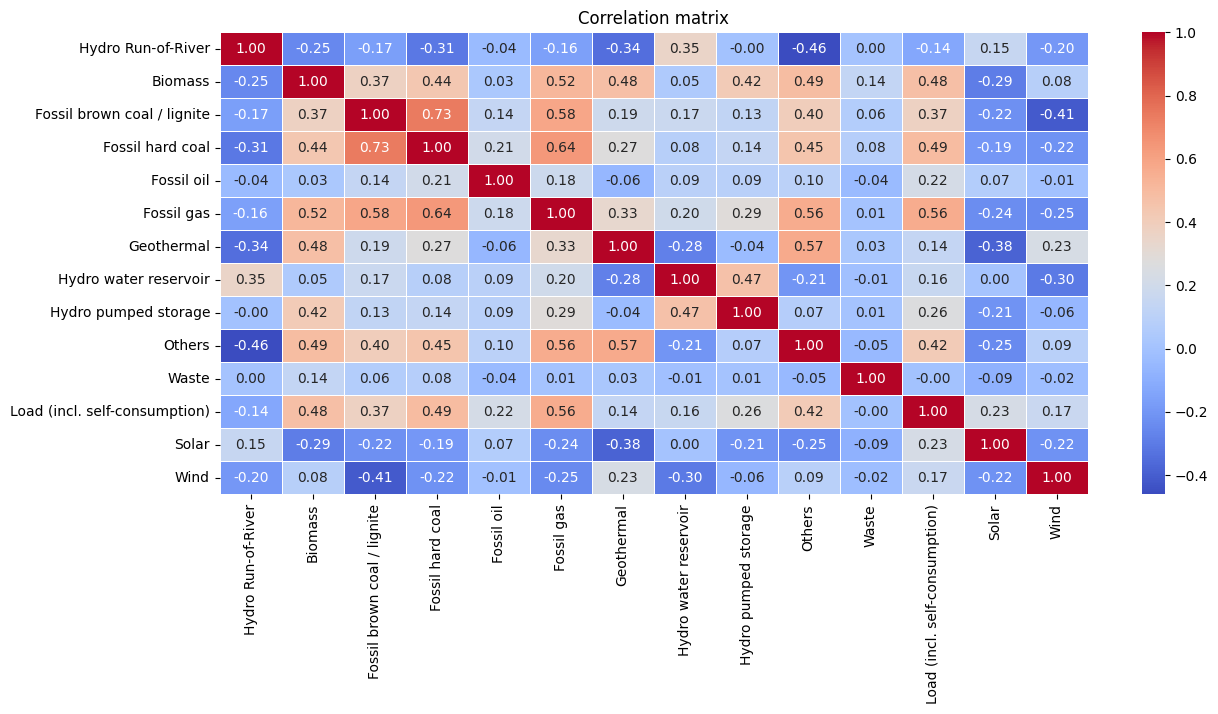

In [ ]:
# We have too many variables, check which are correlated

corr = dfd.corr()

plt.figure(figsize=(14, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation matrix')
plt.show()

In [ ]:
selected_features = [
    'Fossil gas',
    'Biomass',
    'Fossil brown coal / lignite',
    'Fossil hard coal',
    'Hydro pumped storage',
    'Others',
    'Solar',
    'Fossil oil'
]

In [ ]:
data = dfd.copy()
data.index = pd.to_datetime(data.index)  # убедимся, что индекс — это datetime

data['year'] = data.index.year
data['month'] = data.index.month
data['weekday'] = data.index.weekday
data['hour'] = data.index.hour
data = data.reset_index(drop=True)

In [ ]:
data

,Hydro Run-of-River,Biomass,Fossil brown coal / lignite,Fossil hard coal,Fossil oil,Fossil gas,Geothermal,Hydro water reservoir,Hydro pumped storage,Others,Waste,Load (incl. self-consumption),Solar,Wind,year,month,weekday,hour
0,1591.9,5396.8,9410.0,2200.5,503.8,9408.1,27.9,451.2,1026.3,1630.5,1399.9,47213.4,4.9,6410.4,2019,12,1,23
1,1586.9,5390.0,9434.5,2159.4,503.9,9209.9,27.9,385.7,628.8,1609.6,1409.5,46952.8,4.7,6407.3,2019,12,1,23
2,1581.2,5372.1,9467.0,2153.1,503.9,9069.3,27.9,274.5,528.6,1609.2,1416.4,46620.7,4.5,6649.0,2019,12,1,23
3,1581.3,5372.3,9479.7,2186.7,503.9,8956.1,27.8,98.7,312.0,1609.5,1408.1,46425.5,4.6,6896.0,2019,12,1,23
4,1581.8,5369.3,9540.4,2145.8,503.9,8659.5,27.9,244.1,723.0,1609.3,1385.0,46283.2,4.5,6985.2,2020,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187190,1684.6,4534.7,7411.2,1109.6,331.8,4555.1,15.1,260.0,772.0,1083.6,894.8,44676.6,0.0,10876.0,2025,5,6,21
187191,1666.2,4526.7,7232.7,1029.7,331.8,4540.2,15.1,127.0,507.0,1083.6,889.3,43930.1,0.0,11291.0,2025,5,6,21
187192,1666.2,4521.0,7272.7,981.7,331.8,4507.2,15.1,87.0,213.0,1083.6,883.9,43159.4,0.0,11757.0,2025,5,6,21
187193,1670.8,4514.2,6999.9,973.7,331.8,4415.6,15.1,80.0,128.0,1083.6,883.9,42970.9,0.0,12009.0,2025,5,6,21


In [ ]:
for lag in [1, 4, 96, 672]:
    data[f'Load_lag_{lag}'] = data['Load (incl. self-consumption)'].shift(lag)

data=data.dropna()

In [ ]:
data.columns

Index(['Hydro Run-of-River', 'Biomass', 'Fossil brown coal / lignite',
       'Fossil hard coal', 'Fossil oil', 'Fossil gas', 'Geothermal',
       'Hydro water reservoir', 'Hydro pumped storage', 'Others', 'Waste',
       'Load (incl. self-consumption)', 'Solar', 'Wind', 'year', 'month',
       'weekday', 'hour', 'Load_lag_1', 'Load_lag_4', 'Load_lag_96',
       'Load_lag_672'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
# Applying the default XGBoost model

# Create objects X and y
X = data[[
    'Fossil gas',
    'Biomass',
    'Fossil brown coal / lignite',
    'Fossil hard coal',
    'Hydro pumped storage',
    'Others',
    'Solar',
    'Fossil oil',
    'year',
    'month',
    'weekday',
    'hour',
    'Load_lag_1',
    'Load_lag_4',
    'Load_lag_96',
    'Load_lag_672'
]]

X=X.dropna()
y = data['Load (incl. self-consumption)']

horizon = 672  # 1 неделя при 15-минутных интервалах

# Создаём multi-output y (каждая строка — прогноз от t+1 до t+672)
y_multi = np.column_stack([
    data['Load (incl. self-consumption)'].shift(-i) for i in range(1, horizon + 1)
])

# Финальная выборка (убираем NaN из-за лагов и сдвигов)
X_final = X.iloc[:-horizon].copy()
y_final = y_multi[:-horizon]


# Сначала делим на train/test
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X_final, y_final, test_size=0.1, random_state=12345, shuffle=False)

# Потом делим train на train/val — на основе X_train_full, а не X_final
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42, shuffle=False)

# XGB

In [ ]:
pip install --upgrade xgboost

In [ ]:
from joblib import Parallel, delayed
from sklearn.base import clone
from xgboost import XGBRegressor
from tqdm import tqdm

base_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=1,
    verbosity=0
)

def train_one(i):
    model = clone(base_model)
    model.fit(X_train, y_train[:, i])
    return model

models = Parallel(n_jobs=-1)(
    delayed(train_one)(i) for i in tqdm(range(y_train.shape[1]), desc="Обучение XGB")
)

Обучение LGBM: 100%|██████████| 672/672 [15:08<00:00,  1.35s/it]


In [ ]:
for i, model in enumerate(models):
    model.save_model(f"xgb_model_{i}.json")  # или .model

from xgboost import XGBRegressor

model = XGBRegressor()
model.load_model("xgb_model_0.json")

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Получаем прогнозы от всех 672 моделей
y_pred = np.column_stack([model.predict(X_test) for model in models])

# Проверяем, совпадают ли размеры
print("Shape y_test:", y_test.shape)
print("Shape y_pred:", y_pred.shape)

# На случай несовпадения — подрежем до общего минимума (подстраховка)
min_len = min(y_test.shape[0], y_pred.shape[0])
y_test_eval = y_test[:min_len]
y_pred_eval = y_pred[:min_len]

# Считаем метрики
mae = mean_absolute_error(y_test_eval, y_pred_eval)
rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred_eval))
r2 = r2_score(y_test_eval, y_pred_eval)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

Shape y_test: (18586, 672)
Shape y_pred: (18586, 672)
MAE: 3076.37
RMSE: 4157.77
R²: 0.8165


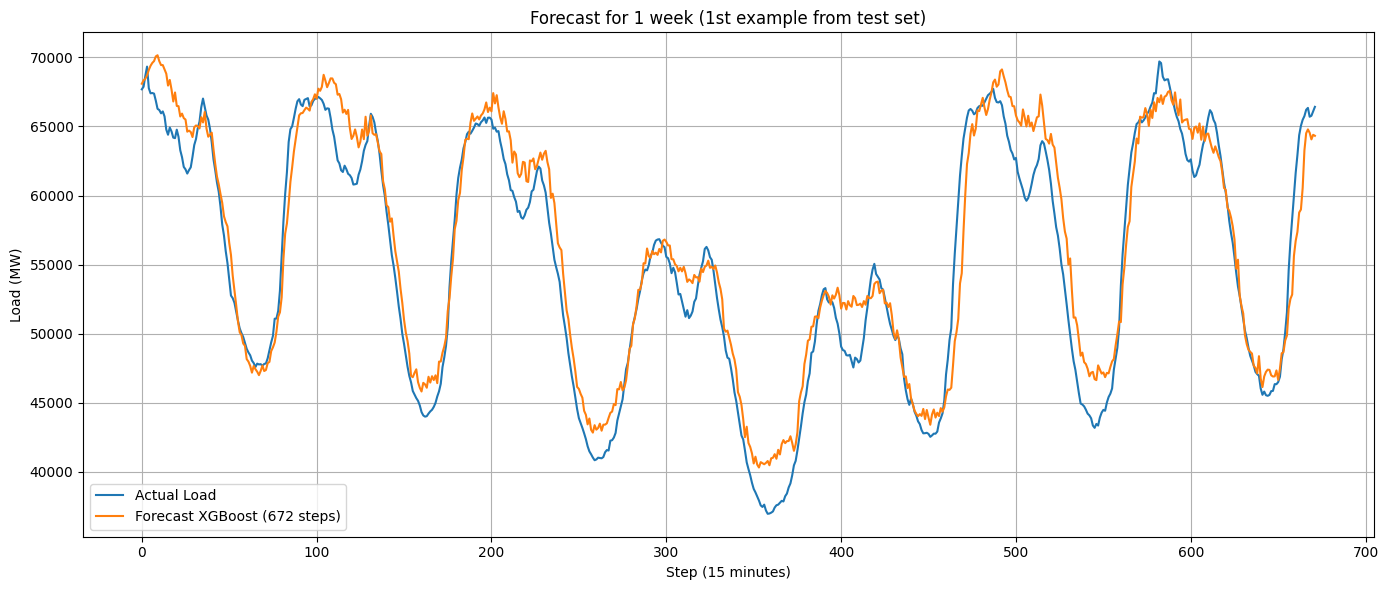

In [ ]:
import matplotlib.pyplot as plt
# График прогноза и фактической нагрузки на 1 неделю (1-й пример)
plt.figure(figsize=(14, 6))
plt.plot(y_test[:min_len][0], label='Actual Load')
plt.plot(y_pred[:min_len][0], label='Forecast XGBoost (672 steps)')
plt.title('Forecast for 1 week (1st example from test set)')
plt.xlabel('Step (15 minutes)')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

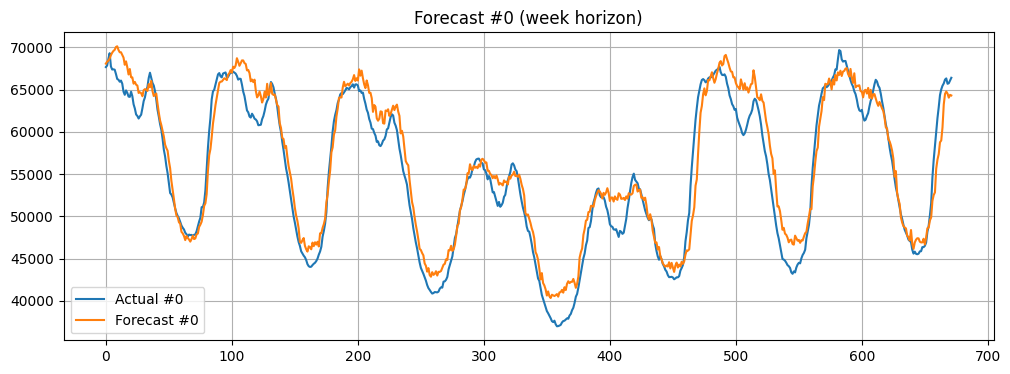

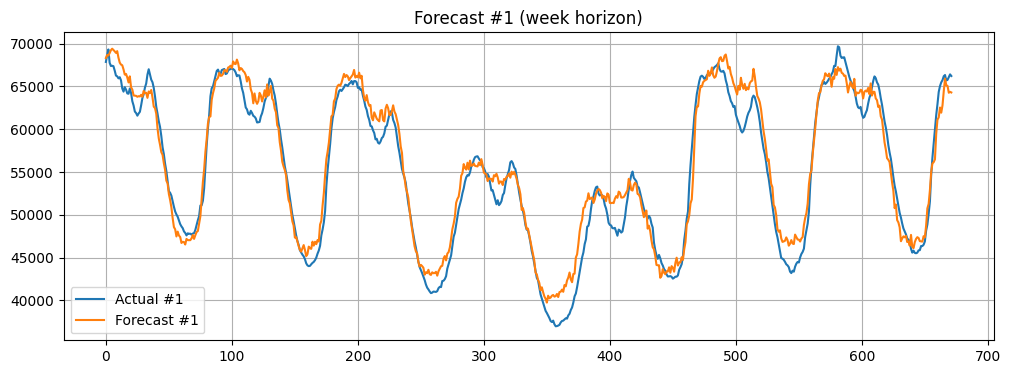

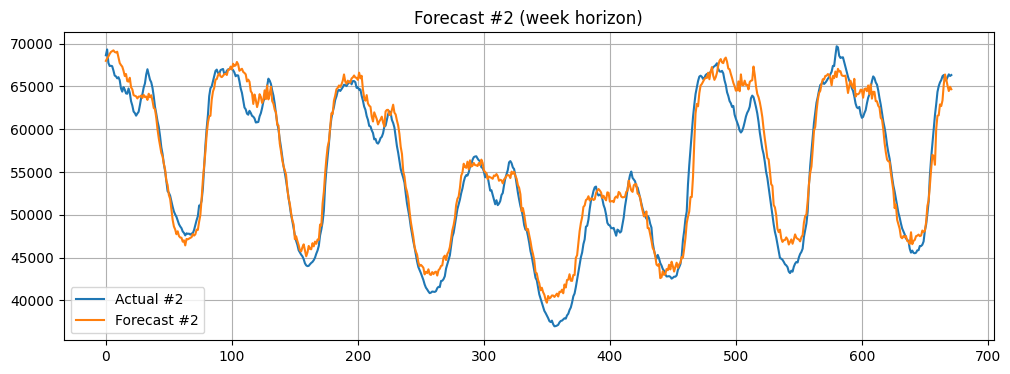

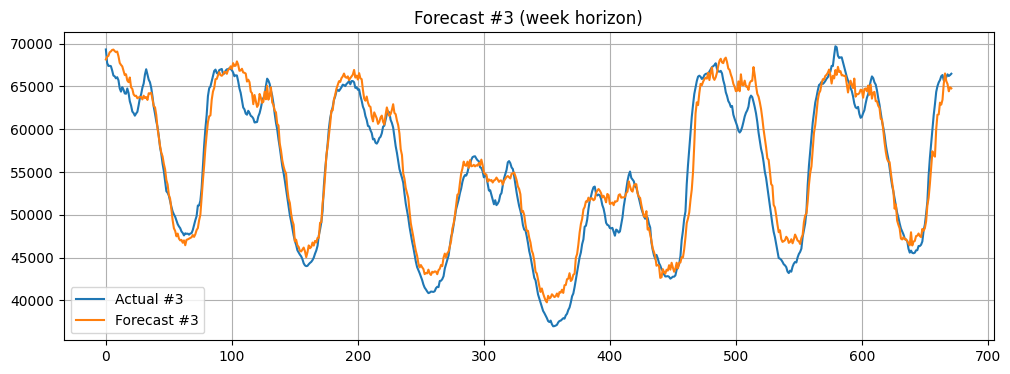

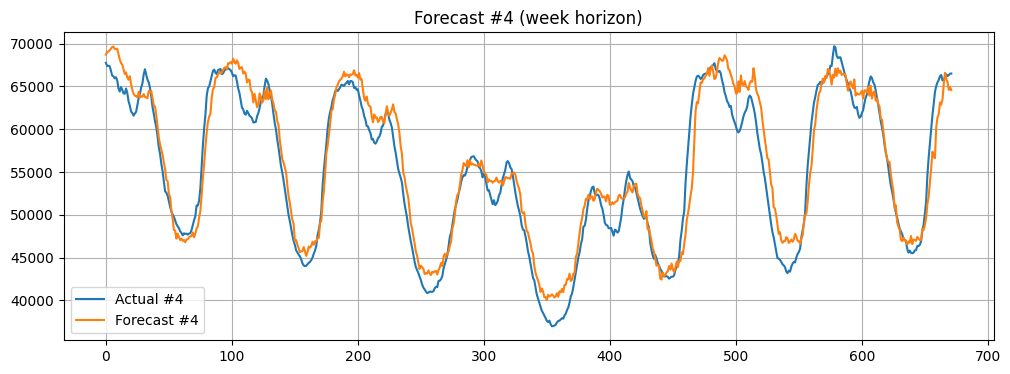

In [ ]:
for i in range(5):
    plt.figure(figsize=(12, 4))
    plt.plot(y_test[i], label=f'Actual #{i}')
    plt.plot(y_pred[i], label=f'Forecast #{i}')
    plt.title(f'Forecast #{i} (week horizon)')
    plt.legend()
    plt.grid(True)
    plt.show()

# LGBM

In [ ]:
!pip install --upgrade tqdm

In [ ]:
from joblib import Parallel, delayed
from sklearn.base import clone
from lightgbm import LGBMRegressor
from tqdm import tqdm

base_model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=1,  # важно оставить n_jobs=1, чтобы избежать конфликтов при параллельной обучении
    verbose=-1
)

def train_one(i):
    model = clone(base_model)
    model.fit(X_train, y_train[:, i])
    return model

models = Parallel(n_jobs=-1)(
    delayed(train_one)(i) for i in tqdm(range(y_train.shape[1]), desc="Обучение LGBM")
)


Обучение LGBM: 100%|██████████| 672/672 [15:12<00:00,  1.36s/it]


In [ ]:
for i, model in enumerate(models):
    booster = model.booster_  # доступ к внутреннему объекту Booster
    booster.save_model(f"lgbm_model_{i}.txt")

import lightgbm as lgb

booster = lgb.Booster(model_file="lgbm_model_0.txt")

In [ ]:
import os
import lightgbm as lgb
from tqdm import tqdm

n_models = 672
models = []

for i in tqdm(range(n_models), desc="Загрузка моделей"):
    path = f"lgbm_model_{i}.txt"
    if os.path.exists(path):
        booster = lgb.Booster(model_file=path)
        models.append(booster)
    else:
        print(f"⚠️  Модель {path} не найдена — пропускаем.")



Загрузка моделей: 100%|██████████| 672/672 [00:04<00:00, 140.31it/s]


In [ ]:
# Получение важности для каждой модели
all_importances = np.array([
    model.feature_importance(importance_type='split')  # или 'gain'
    for model in models
])

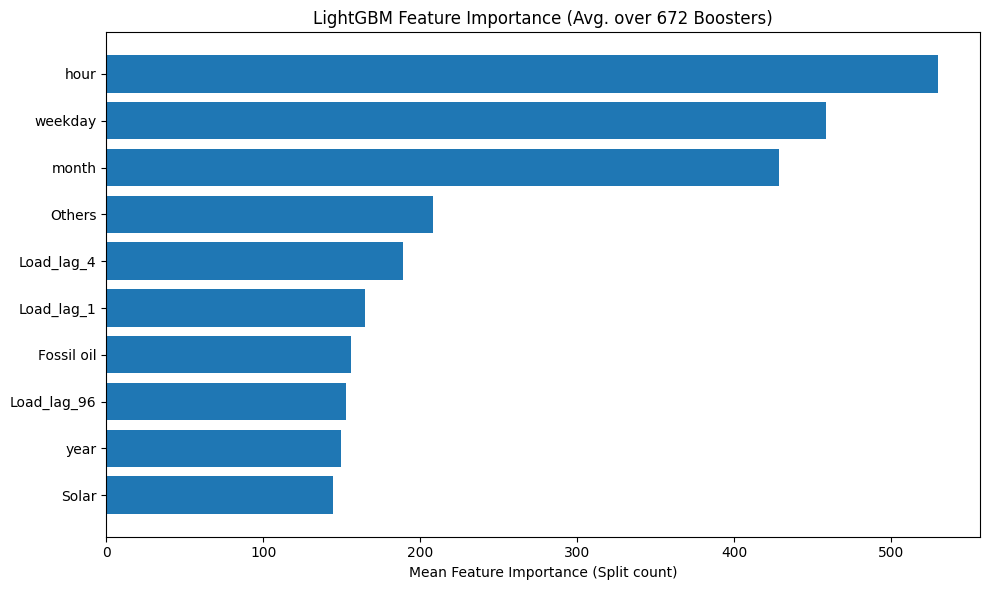

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Средняя важность
mean_importances = all_importances.mean(axis=0)

# feature_names должен соответствовать порядку колонок X_train
feature_names = X_train.columns  # X_train должен быть доступен

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_importances
}).sort_values(by='importance', ascending=False)

# Визуализация топ-10
plt.figure(figsize=(10, 6))
plt.barh(
    importance_df['feature'].head(10)[::-1],
    importance_df['importance'].head(10)[::-1]
)
plt.xlabel('Mean Feature Importance (Split count)')
plt.title('LightGBM Feature Importance (Avg. over 672 Boosters)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Получаем прогнозы от всех 672 моделей
y_pred = np.column_stack([model.predict(X_test) for model in models])

# Проверяем, совпадают ли размеры
print("Shape y_test:", y_test.shape)
print("Shape y_pred:", y_pred.shape)

# На случай несовпадения — подрежем до общего минимума (подстраховка)
min_len = min(y_test.shape[0], y_pred.shape[0])
y_test_eval = y_test[:min_len]
y_pred_eval = y_pred[:min_len]

# Считаем метрики
mae = mean_absolute_error(y_test_eval, y_pred_eval)
rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred_eval))
r2 = r2_score(y_test_eval, y_pred_eval)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

Shape y_test: (18586, 672)
Shape y_pred: (18586, 672)
MAE: 3132.43
RMSE: 4212.79
R²: 0.8116


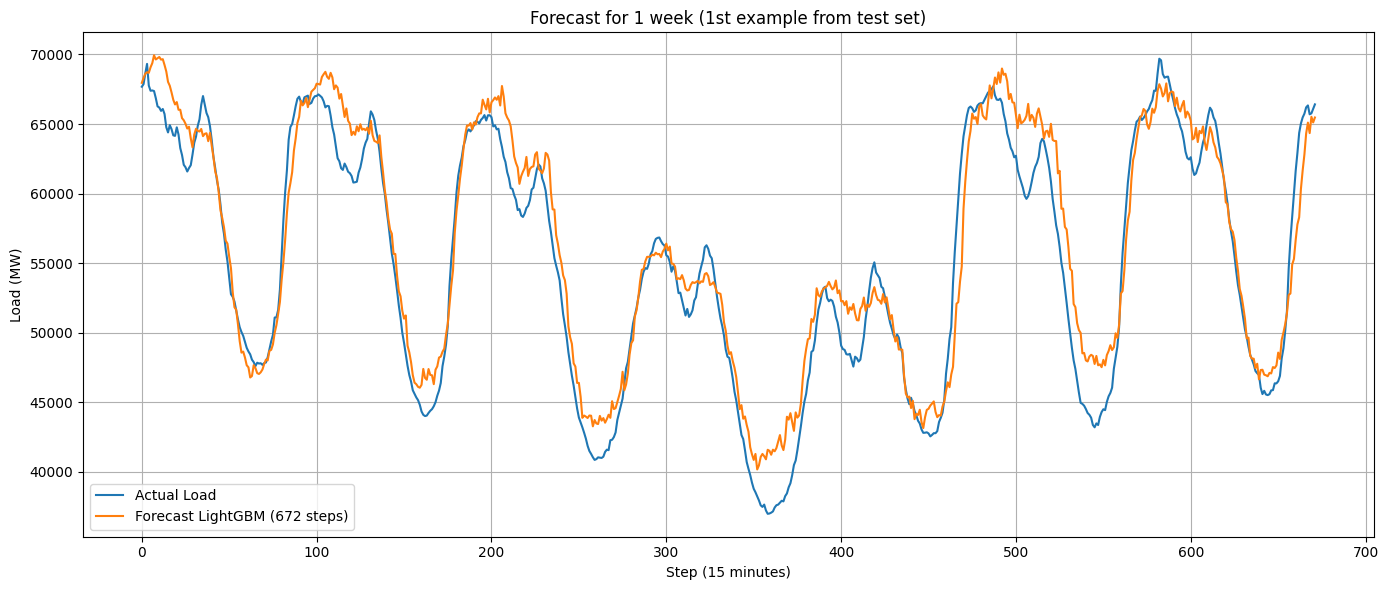

In [ ]:
import matplotlib.pyplot as plt
# График прогноза и фактической нагрузки на 1 неделю (1-й пример)
plt.figure(figsize=(14, 6))
plt.plot(y_test[:min_len][0], label='Actual Load')
plt.plot(y_pred[:min_len][0], label='Forecast LightGBM (672 steps)')
plt.title('Forecast for 1 week (1st example from test set)')
plt.xlabel('Step (15 minutes)')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# CatBoost

In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.4 MB/s eta 0:00:00


Загрузка моделей:   1%|          | 5/672 [24:45<55:02:51, 297.11s/it]


In [ ]:
from joblib import Parallel, delayed
from sklearn.base import clone
from catboost import CatBoostRegressor
from tqdm import tqdm

base_model = CatBoostRegressor(
    iterations=100,
    learning_rate=0.05,
    depth=6,
    subsample=0.8,
    random_seed=42,
    verbose=0,
    allow_writing_files=False  # чтобы не создавать лишние логи
)

def train_one(i):
    model = clone(base_model)
    model.fit(X_train, y_train[:, i])
    return model

models = Parallel(n_jobs=-1)(
    delayed(train_one)(i) for i in tqdm(range(y_train.shape[1]), desc="Обучение CatBoost")
)


Обучение CatBoost: 100%|██████████| 672/672 [34:46<00:00,  3.11s/it]


In [ ]:
for i, model in enumerate(models):
    model.save_model(f"catboost_model_{i}.cbm", format="cbm")

In [ ]:
import os
from catboost import CatBoostRegressor
from tqdm import tqdm

n_models = 672
models = []

for i in tqdm(range(n_models), desc="Загрузка моделей"):
    path = f"catboost_model_{i}.cbm"
    if os.path.exists(path):
        model = CatBoostRegressor()
        model.load_model(path)
        models.append(model)
    else:
        print(f"⚠️  Модель {path} не найдена — пропускаем.")

Загрузка моделей: 100%|██████████| 672/672 [00:01<00:00, 563.80it/s]


In [ ]:
import numpy as np

# Важно: CatBoost возвращает важности как список float
all_importances = np.array([
    model.get_feature_importance(type='FeatureImportance')  # можно также 'PredictionValuesChange'
    for model in models
])

mean_importances = all_importances.mean(axis=0)

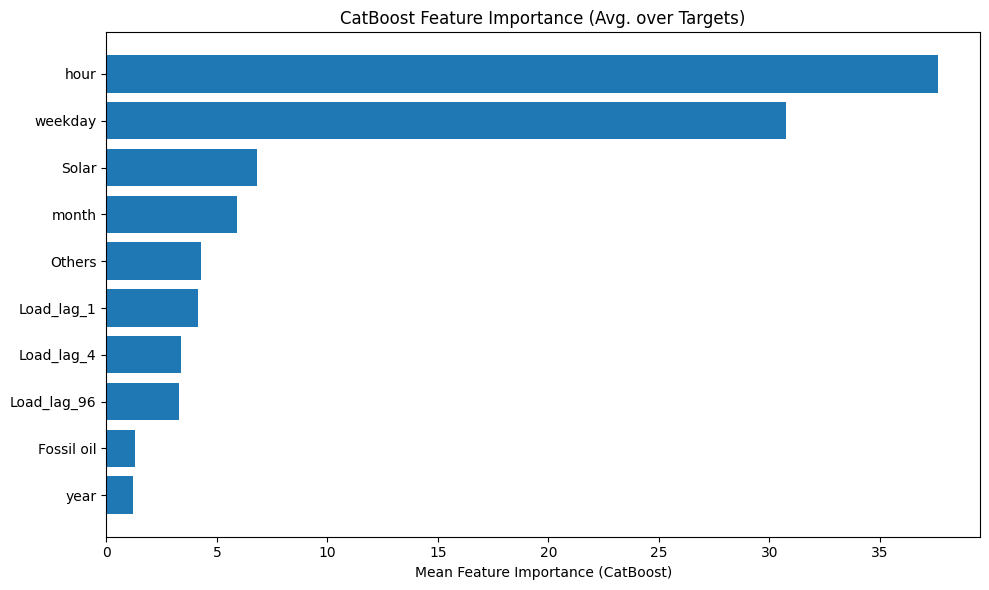

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = X_train.columns

importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(
    importance_df['feature'].head(10)[::-1],
    importance_df['importance'].head(10)[::-1]
)
plt.xlabel('Mean Feature Importance (CatBoost)')
plt.title('CatBoost Feature Importance (Avg. over Targets)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Получаем прогнозы от всех 672 моделей
y_pred = np.column_stack([model.predict(X_test) for model in models])

# Проверяем, совпадают ли размеры
print("Shape y_test:", y_test.shape)
print("Shape y_pred:", y_pred.shape)

# На случай несовпадения — подрежем до общего минимума (подстраховка)
min_len = min(y_test.shape[0], y_pred.shape[0])
y_test_eval = y_test[:min_len]
y_pred_eval = y_pred[:min_len]

# Считаем метрики
mae = mean_absolute_error(y_test_eval, y_pred_eval)
rmse = np.sqrt(mean_squared_error(y_test_eval, y_pred_eval))
r2 = r2_score(y_test_eval, y_pred_eval)

print("MAE:", round(mae, 2))
print("RMSE:", round(rmse, 2))
print("R²:", round(r2, 4))

Shape y_test: (18586, 672)
Shape y_pred: (18586, 672)
MAE: 3312.94
RMSE: 4418.04
R²: 0.7928


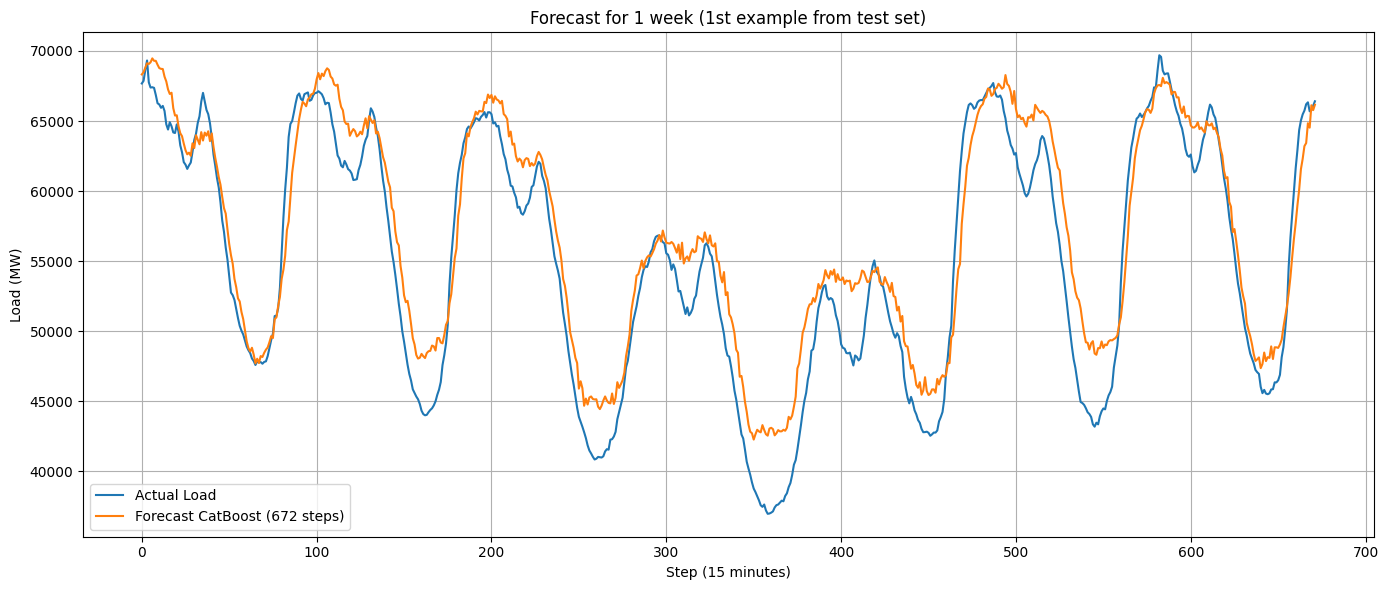

In [ ]:
import matplotlib.pyplot as plt
# График прогноза и фактической нагрузки на 1 неделю (1-й пример)
plt.figure(figsize=(14, 6))
plt.plot(y_test[:min_len][0], label='Actual Load')
plt.plot(y_pred[:min_len][0], label='Forecast CatBoost (672 steps)')
plt.title('Forecast for 1 week (1st example from test set)')
plt.xlabel('Step (15 minutes)')
plt.ylabel('Load (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Total comparison

In [ ]:
from xgboost import XGBRegressor

xgb_models = []
for i in range(672):
    model = XGBRegressor()
    model.load_model(f"xgb_model_{i}.json")
    xgb_models.append(model)

# Предсказания
xgb_fcst = np.column_stack([model.predict(X_test) for model in xgb_models])

In [ ]:
import lightgbm as lgb

lgbm_models = []
for i in range(672):
    model = lgb.Booster(model_file=f"lgbm_model_{i}.txt")
    lgbm_models.append(model)

# Предсказания
lgbm_fcst = np.column_stack([model.predict(X_test) for model in lgbm_models])

In [ ]:
from catboost import CatBoostRegressor

cat_models = []
for i in range(672):
    model = CatBoostRegressor()
    model.load_model(f"catboost_model_{i}.cbm")
    cat_models.append(model)

# Предсказания
cat_fcst = np.column_stack([model.predict(X_test) for model in cat_models])

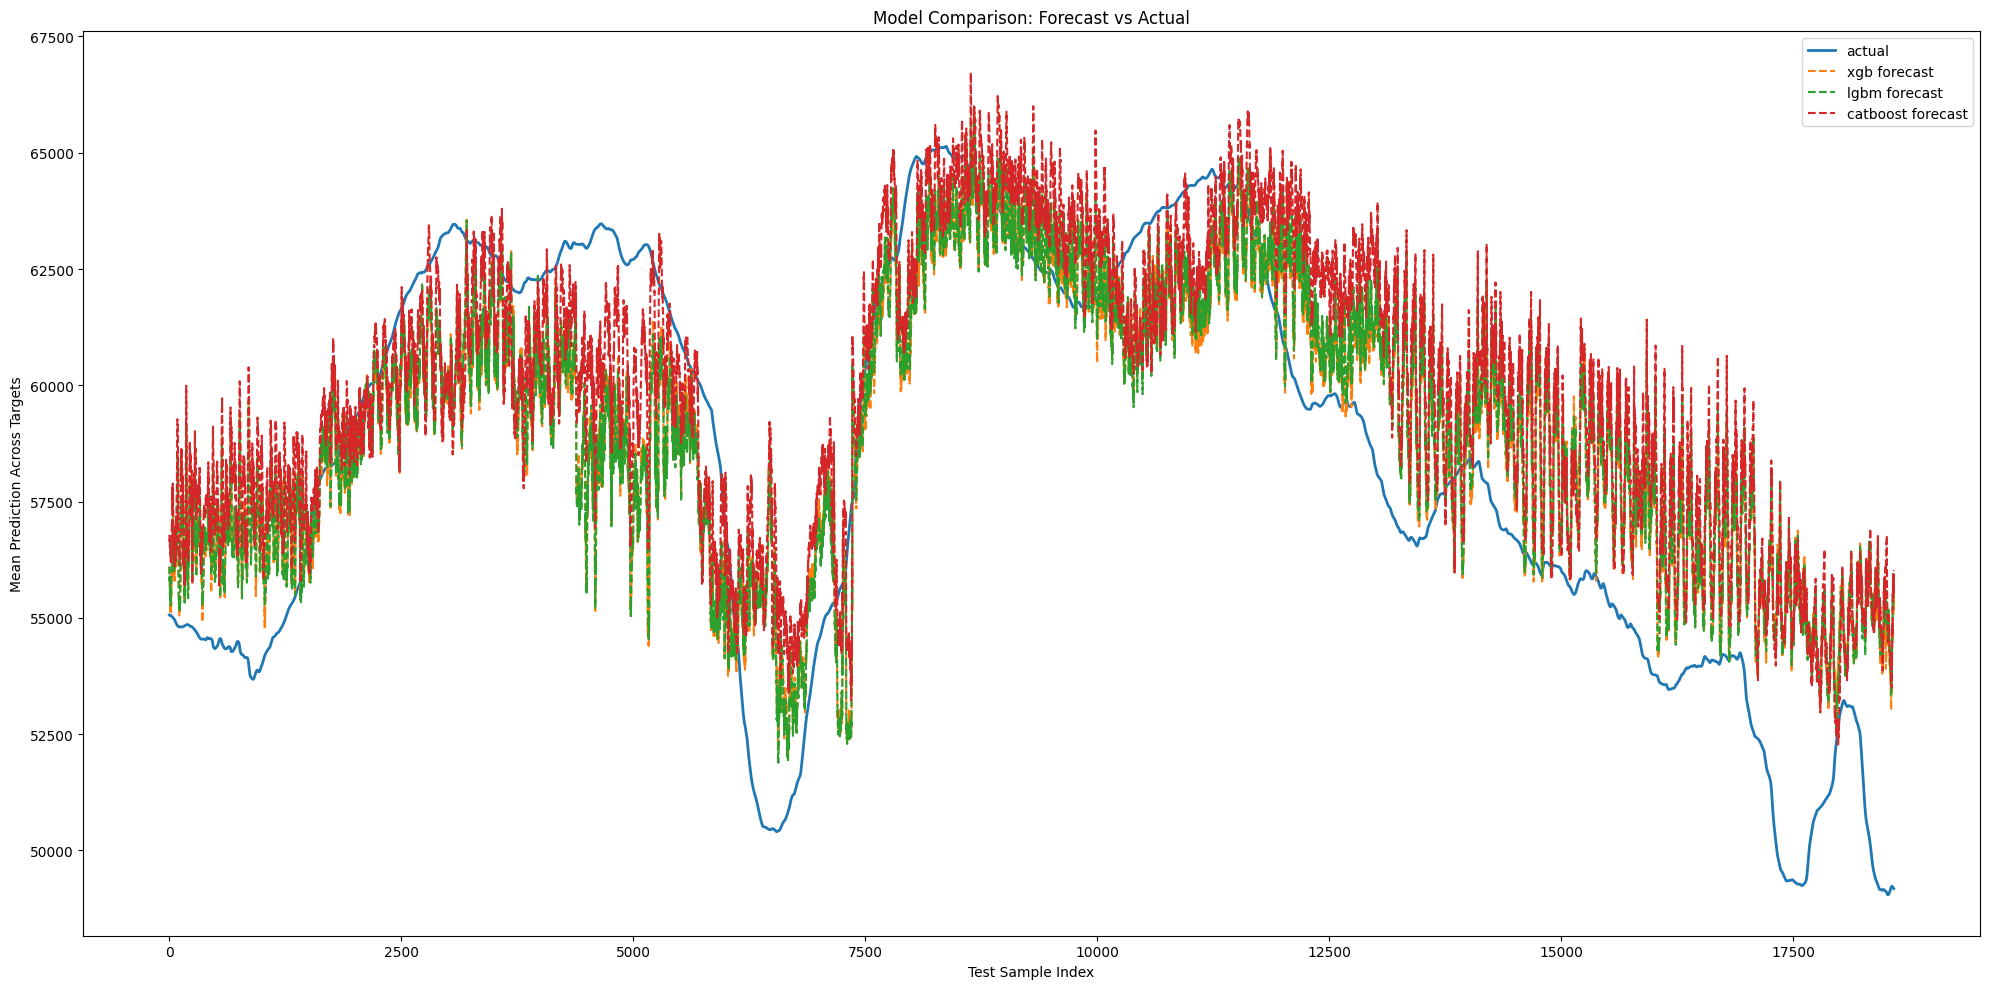

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Среднее по всем 672 таргетам
y_test_mean = y_test.mean(axis=1)
xgb_fcst_mean = xgb_fcst.mean(axis=1)
lgbm_fcst_mean = lgbm_fcst.mean(axis=1)
cat_fcst_mean = cat_fcst.mean(axis=1)

plt.figure(figsize=(20, 10))
plt.plot(y_test_mean, label='actual', linewidth=2)
plt.plot(xgb_fcst_mean, label='xgb forecast', linestyle='--')
plt.plot(lgbm_fcst_mean, label='lgbm forecast', linestyle='--')
plt.plot(cat_fcst_mean, label='catboost forecast', linestyle='--')
plt.legend()
plt.ylabel('Mean Prediction Across Targets')
plt.xlabel('Test Sample Index')
plt.title('Model Comparison: Forecast vs Actual')
plt.tight_layout()
plt.show()

# Futher upgrade: Applying a Bayesian Optimization

## XGB Bayesian Optimization

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.1 MB/s eta 0:00:00


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import random
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

random.seed(0)

xgb_opt = BayesSearchCV(
    XGBRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(3, 12, 'uniform'),
        'n_estimators' : (50, 500, 'uniform'),
    },
    n_iter=10,
    cv=3,
    verbose=1
)

xgb_opt.fit(X_train, y_train)
xgb_tuned_fcst = xgb_opt.best_estimator_.predict(X_test)
r2_score(list(y_test), list(xgb_tuned_fcst))

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits


0.998140781387997

In [ ]:
print("Best Score:", xgb_opt.best_score_)
print("Best Parameters:", xgb_opt.best_params_)

Best Score: 0.9986313679538997
Best Parameters: OrderedDict([('learning_rate', 0.049419631051743525), ('max_depth', 9), ('n_estimators', 357)])


In [ ]:
import pandas as pd

results_df = pd.DataFrame(xgb_opt.cv_results_)
pd.set_option('display.max_columns', None)  # Показать все столбцы
display(results_df[['params', 'mean_test_score', 'std_test_score']])

,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.0009562797305356491, 'max_...",0.550351,0.019304
1,"{'learning_rate': 0.0024131997751364637, 'max_...",0.650045,0.015068
2,"{'learning_rate': 1.6907761873851055e-05, 'max...",-0.061788,0.045781
3,"{'learning_rate': 0.049419631051743525, 'max_d...",0.998631,0.000191
4,"{'learning_rate': 1.2809001820427288e-05, 'max...",-0.056632,0.045575
5,"{'learning_rate': 2.137845196051015e-05, 'max_...",-0.043577,0.044994
6,"{'learning_rate': 0.0002335593504303213, 'max_...",0.029790,0.041820
7,"{'learning_rate': 0.0001081852583563556, 'max_...",0.017649,0.042450
8,"{'learning_rate': 0.4492893912823393, 'max_dep...",0.998005,0.000414
9,"{'learning_rate': 0.0001714309310237557, 'max_...",0.035293,0.041707


In [ ]:
params_df = results_df['params'].apply(pd.Series)
params_df['score'] = results_df['mean_test_score']
params_df

,learning_rate,max_depth,n_estimators,score
0,0.000956,7.0,453.0,0.550351
1,0.002413,6.0,232.0,0.650045
2,0.000017,11.0,55.0,-0.061788
3,0.049420,9.0,357.0,0.998631
4,0.000013,4.0,266.0,-0.056632
5,0.000021,12.0,450.0,-0.043577
6,0.000234,10.0,198.0,0.029790
7,0.000108,4.0,373.0,0.017649
8,0.449289,10.0,108.0,0.998005
9,0.000171,4.0,289.0,0.035293


## LGB Bayesian Optimization

In [ ]:
random.seed(0)
lgbm_opt = BayesSearchCV(
    LGBMRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(3, 12, 'uniform'),
        'n_estimators' : (50, 500, 'uniform'),
    },
    n_iter=10,
    cv=3,
    verbose=1
)

lgbm_opt.fit(X_train, y_train)

lgbm_tuned_fcst = lgbm_opt.best_estimator_.predict(X_test)
r2_score(list(y_test), list(lgbm_tuned_fcst))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006115 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2853
[LightGBM] [Info] Number of data points in the train set: 74981, number of used features: 15
[LightGBM] [Info] Start training from score 59818.559554
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

0.9981700846583883

In [ ]:
print("Best Score:", lgbm_opt.best_score_)
print("Best Parameters:", lgbm_opt.best_params_)

Best Score: 0.998708423002392
Best Parameters: OrderedDict([('learning_rate', 0.1482671709923893), ('max_depth', 9), ('n_estimators', 422)])


In [ ]:
results_df = pd.DataFrame(lgbm_opt.cv_results_)
pd.set_option('display.max_columns', None)  # Показать все столбцы
display(results_df[['params', 'mean_test_score', 'std_test_score']])

,params,mean_test_score,std_test_score
0,"{'learning_rate': 1.5905477408758872e-05, 'max...",-0.049276,0.045181
1,"{'learning_rate': 0.1482671709923893, 'max_dep...",0.998708,0.000141
2,"{'learning_rate': 0.00018423144231170092, 'max...",-0.018840,0.043942
3,"{'learning_rate': 0.00010765475272424156, 'max...",0.026070,0.042022
4,"{'learning_rate': 0.012660242892345411, 'max_d...",0.998515,0.000076
5,"{'learning_rate': 0.13762673920491852, 'max_de...",0.998702,0.000118
6,"{'learning_rate': 1.9786645663676553e-05, 'max...",-0.043975,0.045018
7,"{'learning_rate': 0.9379661468466429, 'max_dep...",0.997921,0.000310
8,"{'learning_rate': 2.4664071321282264e-05, 'max...",-0.043028,0.044977
9,"{'learning_rate': 0.0005885652428525509, 'max_...",0.177244,0.035542


In [ ]:
params_df = results_df['params'].apply(pd.Series)
params_df['score'] = results_df['mean_test_score']
params_df

,learning_rate,max_depth,n_estimators,score
0,0.000016,3.0,445.0,-0.049276
1,0.148267,9.0,422.0,0.998708
2,0.000184,6.0,118.0,-0.018840
3,0.000108,8.0,413.0,0.026070
4,0.012660,5.0,425.0,0.998515
5,0.137627,6.0,129.0,0.998702
6,0.000020,11.0,478.0,-0.043975
7,0.937966,6.0,195.0,0.997921
8,0.000025,8.0,402.0,-0.043028
9,0.000589,10.0,220.0,0.177244


## CatBoost Bayesian Optimization

In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
import random
from sklearn.metrics import r2_score

random.seed(0)

cat_opt = BayesSearchCV(
    CatBoostRegressor(),
    {
        'learning_rate': (10e-6, 1.0, 'log-uniform'),
        'max_depth': Integer(3, 12, 'uniform'),
        'n_estimators' : (50, 500, 'uniform'),
    },
    n_iter=10,
    cv=3,
    verbose=1
)

cat_opt.fit(X_train, y_train)
cat_tuned_fcst = cat_opt.best_estimator_.predict(X_test)
r2_score(list(y_test), list(cat_tuned_fcst))

Выходные данные были обрезаны до нескольких последних строк (5000).
78:	learn: 8482.8445227	total: 1.13s	remaining: 2.6s
79:	learn: 8462.5267747	total: 1.14s	remaining: 2.58s
80:	learn: 8441.7473537	total: 1.15s	remaining: 2.56s
81:	learn: 8421.5558536	total: 1.17s	remaining: 2.54s
82:	learn: 8401.0836701	total: 1.18s	remaining: 2.53s
83:	learn: 8380.6768683	total: 1.19s	remaining: 2.51s
84:	learn: 8360.9647939	total: 1.21s	remaining: 2.5s
85:	learn: 8340.6156176	total: 1.22s	remaining: 2.48s
86:	learn: 8320.5781833	total: 1.23s	remaining: 2.46s
87:	learn: 8300.7074082	total: 1.25s	remaining: 2.45s
88:	learn: 8280.7678433	total: 1.26s	remaining: 2.44s
89:	learn: 8260.6913490	total: 1.28s	remaining: 2.42s
90:	learn: 8240.9073840	total: 1.29s	remaining: 2.41s
91:	learn: 8221.2306252	total: 1.3s	remaining: 2.39s
92:	learn: 8201.8032049	total: 1.32s	remaining: 2.38s
93:	learn: 8181.8527276	total: 1.33s	remaining: 2.36s
94:	learn: 8162.2551973	total: 1.34s	remaining: 2.35s
95:	learn: 8142.7

0.997848317170406

In [ ]:
print("Best Score:", cat_opt.best_score_)
print("Best Parameters:", cat_opt.best_params_)

Best Score: 0.9983088356905995
Best Parameters: OrderedDict([('learning_rate', 0.23427943912251206), ('max_depth', 7), ('n_estimators', 95)])


In [ ]:
results_df = pd.DataFrame(cat_opt.cv_results_)
pd.set_option('display.max_columns', None)  # Показать все столбцы
display(results_df[['params', 'mean_test_score', 'std_test_score']])

,params,mean_test_score,std_test_score
0,"{'learning_rate': 0.00014785712953683177, 'max...",-0.032009,0.044448
1,"{'learning_rate': 0.000662934868554817, 'max_d...",0.060057,0.039711
2,"{'learning_rate': 5.778192186635618e-05, 'max_...",-0.035416,0.044229
3,"{'learning_rate': 0.0025580500320454514, 'max_...",0.691524,0.009823
4,"{'learning_rate': 0.9138464060039349, 'max_dep...",0.997452,0.000372
5,"{'learning_rate': 0.23427943912251206, 'max_de...",0.998309,0.000116
6,"{'learning_rate': 0.0025936171702966096, 'max_...",0.701384,0.007028
7,"{'learning_rate': 0.3179409378431742, 'max_dep...",0.991096,0.010696
8,"{'learning_rate': 0.06760457037598896, 'max_de...",0.996350,0.001097
9,"{'learning_rate': 0.8553715961060115, 'max_dep...",0.998230,0.000142


In [ ]:
params_df = results_df['params'].apply(pd.Series)
params_df['score'] = results_df['mean_test_score']
params_df

,learning_rate,max_depth,n_estimators,score
0,0.000148,9.0,109.0,-0.032009
1,0.000663,8.0,99.0,0.060057
2,0.000058,5.0,252.0,-0.035416
3,0.002558,6.0,261.0,0.691524
4,0.913846,10.0,378.0,0.997452
5,0.234279,7.0,95.0,0.998309
6,0.002594,4.0,272.0,0.701384
7,0.317941,8.0,331.0,0.991096
8,0.067605,12.0,94.0,0.996350
9,0.855372,7.0,315.0,0.998230


## Total comparison after optimisation

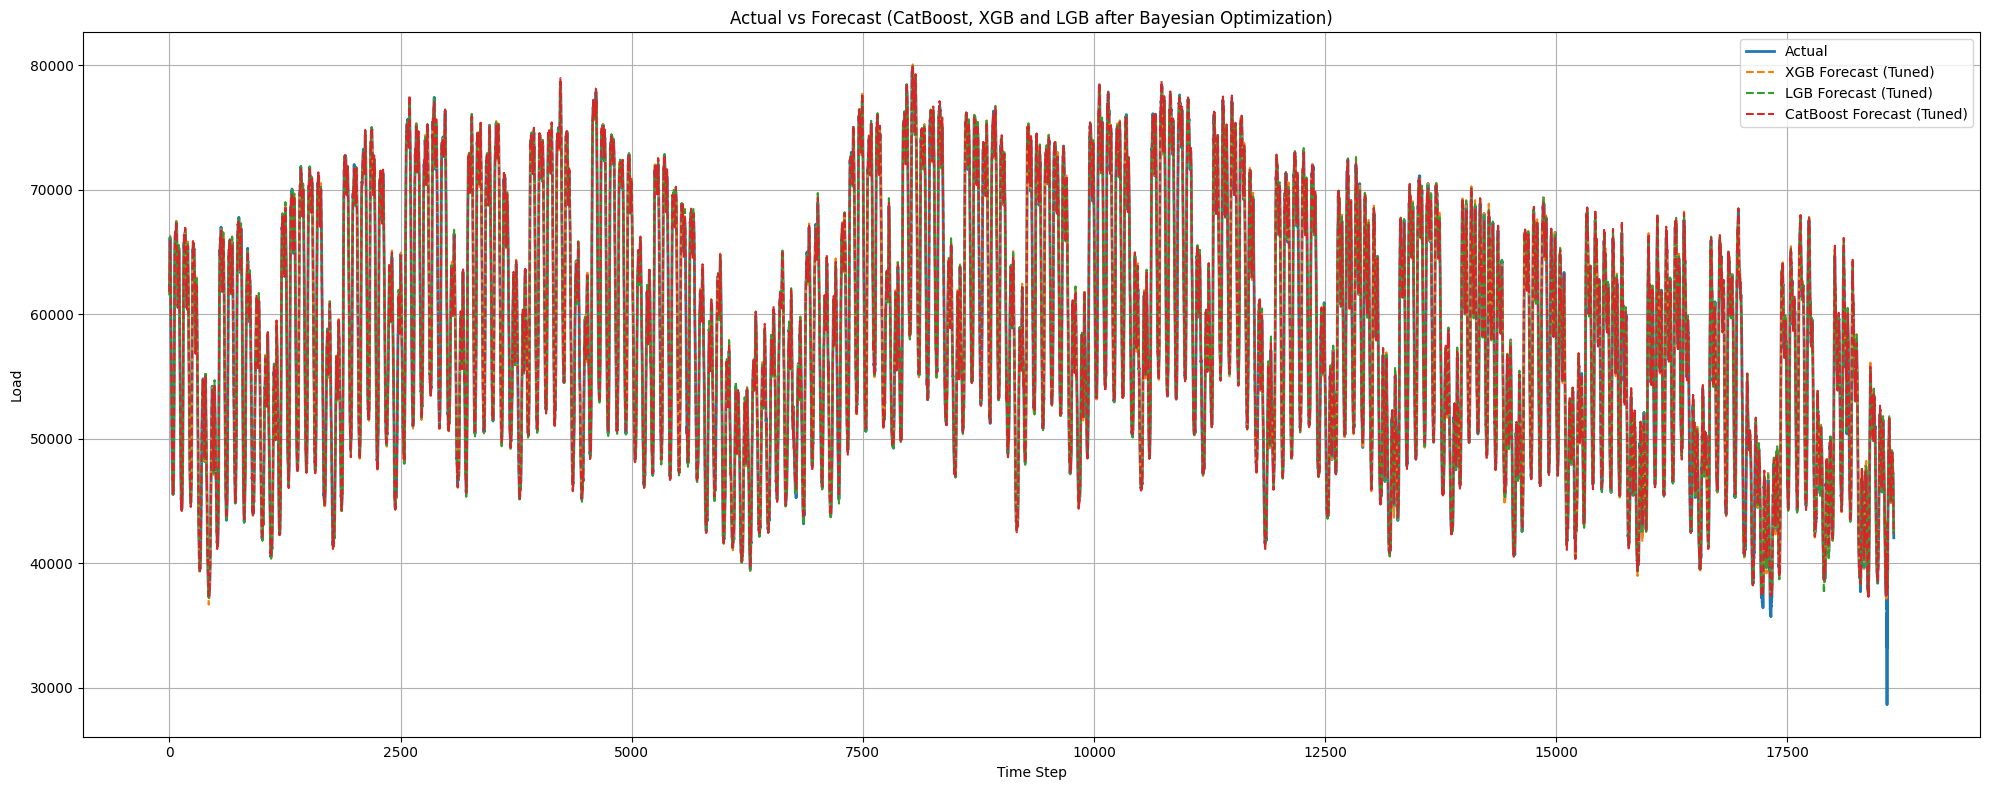

In [ ]:
plt.figure(figsize=(20, 8))
plt.plot(list(y_test.values), label='Actual', linewidth=2)
plt.plot(list(xgb_tuned_fcst), label='XGB Forecast (Tuned)', linestyle='--')
plt.plot(list(lgbm_tuned_fcst), label='LGB Forecast (Tuned)', linestyle='--')
plt.plot(list(cat_tuned_fcst), label='CatBoost Forecast (Tuned)', linestyle='--')

plt.legend()
plt.title('Actual vs Forecast (CatBoost, XGB and LGB after Bayesian Optimization)')
plt.xlabel('Time Step')
plt.ylabel('Load')
plt.grid(True)
plt.tight_layout()
plt.show()